In [1]:
# Aula 07 - Machine Learning - Regressão Linear
! pip install numpy # instalação da biblioteca numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
!pip install scikit-learn 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Dados de treinamento
vazao=np.array([10, 20, 30, 5, 35, 40]).reshape((-1, 1)) # vazão de água em m3/min
nivel=np.array([50, 60, 70, 45, 80, 85]) # nível do tanque em metros
# Criar e treinar o modelo de regressão linear
modelo=LinearRegression()
modelo.fit(vazao, nivel)
# Dados de teste
vazao_teste=np.array([15, 25, 33]).reshape((-1, 1)) # vazão de água em m3/min
vazao_teste=np.array([5, 2, 7, 30, 50]).reshape((-1, 1)) # vazão de água em m3/min
# Fazer previsões com base nas vazão de agua
nivel_previsto=modelo.predict(vazao_teste)
nivel_previsto

array([44.02542373, 40.59322034, 46.31355932, 72.62711864, 95.50847458])

Vazão: 5 m3/min -> Nível previsto: 44.03 metros
Vazão: 2 m3/min -> Nível previsto: 40.59 metros
Vazão: 7 m3/min -> Nível previsto: 46.31 metros
Vazão: 30 m3/min -> Nível previsto: 72.63 metros
Vazão: 50 m3/min -> Nível previsto: 95.51 metros


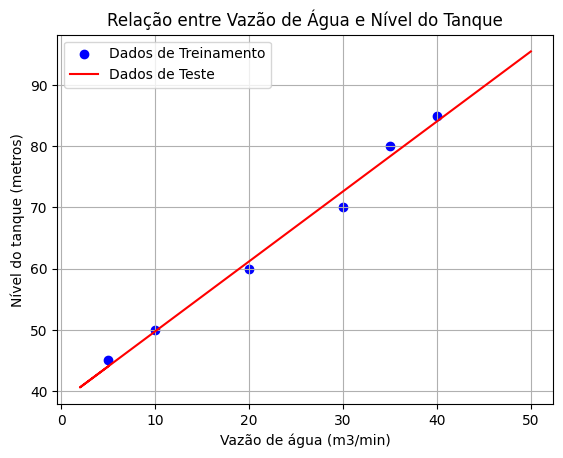

In [11]:
# imprimir as previsões
for i in range(len(vazao_teste)):
    print(f'Vazão: {vazao_teste[i][0]} m3/min -> Nível previsto: {nivel_previsto[i]:.2f} metros')

plt.scatter(vazao, nivel, color='blue', label='Dados de Treinamento')
plt.plot(vazao_teste, nivel_previsto, color='red', label='Dados de Teste')
plt.xlabel('Vazão de água (m3/min)')
plt.ylabel('Nível do tanque (metros)')
plt.title('Relação entre Vazão de Água e Nível do Tanque')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Exercico 2 - Regressão Polimonial
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures # importar a biblioteca de features polinomiais
from sklearn.linear_model import LinearRegression # importar a biblioteca de regressão linear

In [13]:
# Dados fornececidos
Q = np.array([100,200,300,400,500,600,700]).reshape((-1, 1))
T = np.array([30,35,0,45,60,100,150])   #temperatura em graus Celsius

In [14]:
print(Q)
print(T)

[[100]
 [200]
 [300]
 [400]
 [500]
 [600]
 [700]]
[ 30  35   0  45  60 100 150]


In [15]:
# Modelo 1 Regressão Linear Simples
linear_model = LinearRegression() # criar o modelo de regressão linear
linear_model.fit(Q, T) # treinar o modelo
T_linear_pred = linear_model.predict(Q)  # realiza predições de temperatura com regressão linear
print(T_linear_pred)           

[  1.07142857  20.71428571  40.35714286  60.          79.64285714
  99.28571429 118.92857143]


In [17]:
# Modelo 2 Regressão Polinomial de Grau 2
poly = PolynomialFeatures(degree=2) # criar features polinomiais de grau 2
Q_poly = poly.fit_transform(Q) # treina modelo
poly_model = LinearRegression() # armazena modelo
poly_model.fit(Q_poly, T) # treina modelo


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


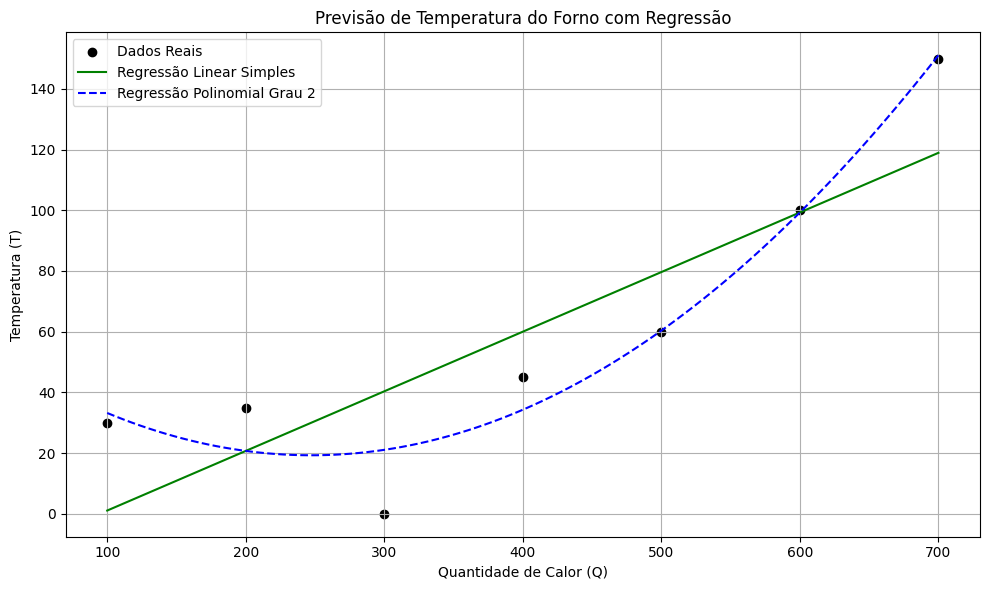

In [22]:
# Geração de valores para curvas
Q_range = np.linspace(100, 700, 100).reshape(-1, 1)
T_linear_curve = linear_model.predict(Q_range)
T_poly_curve = poly_model.predict(poly.transform(Q_range))
# Plotagem do gráfico com os modelos de machine learning
plt.figure(figsize=(10, 6))
plt.scatter(Q, T, color='black', label='Dados Reais')
plt.plot(Q_range, T_linear_curve, color='green', label='Regressão Linear Simples')
plt.plot(Q_range, T_poly_curve, color='blue', linestyle='--' ,label='Regressão Polinomial Grau 2')
plt.title('Previsão de Temperatura do Forno com Regressão')
plt.xlabel('Quantidade de Calor (Q)')
plt.ylabel('Temperatura (T)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()  